In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet

/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
df = pd.read_csv('../data/datasets/onemonthprocessed_nodeload5.csv')
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True)
df = df.drop_duplicates(subset=['ds'], keep='first')
print(df.head(5))
print(df.tail(5))
print(df.describe())
print(df.dtypes)
print(len(df['y']))

                   ds     y
0 2024-05-14 04:37:05  2.90
1 2024-05-14 04:37:10  2.90
2 2024-05-14 04:37:15  2.95
3 2024-05-14 04:37:20  2.95
4 2024-05-14 04:37:25  2.95
                        ds     y
526466 2024-06-13 23:59:40  2.53
526467 2024-06-13 23:59:45  2.56
526468 2024-06-13 23:59:50  2.56
526469 2024-06-13 23:59:55  2.56
526470 2024-06-14 00:00:00  2.56
                                  ds              y
count                         526441  526441.000000
mean   2024-05-29 18:09:31.417471744       4.341710
min              2024-05-14 04:37:05       0.860000
25%              2024-05-22 03:16:25       2.210000
50%              2024-05-29 18:08:35       4.640000
75%              2024-06-06 09:01:55       5.990000
max              2024-06-14 00:00:00      11.640000
std                              NaN       2.203049
ds    datetime64[ns]
y            float64
dtype: object
526441


In [6]:
df['y'].isnull().values.any()

False

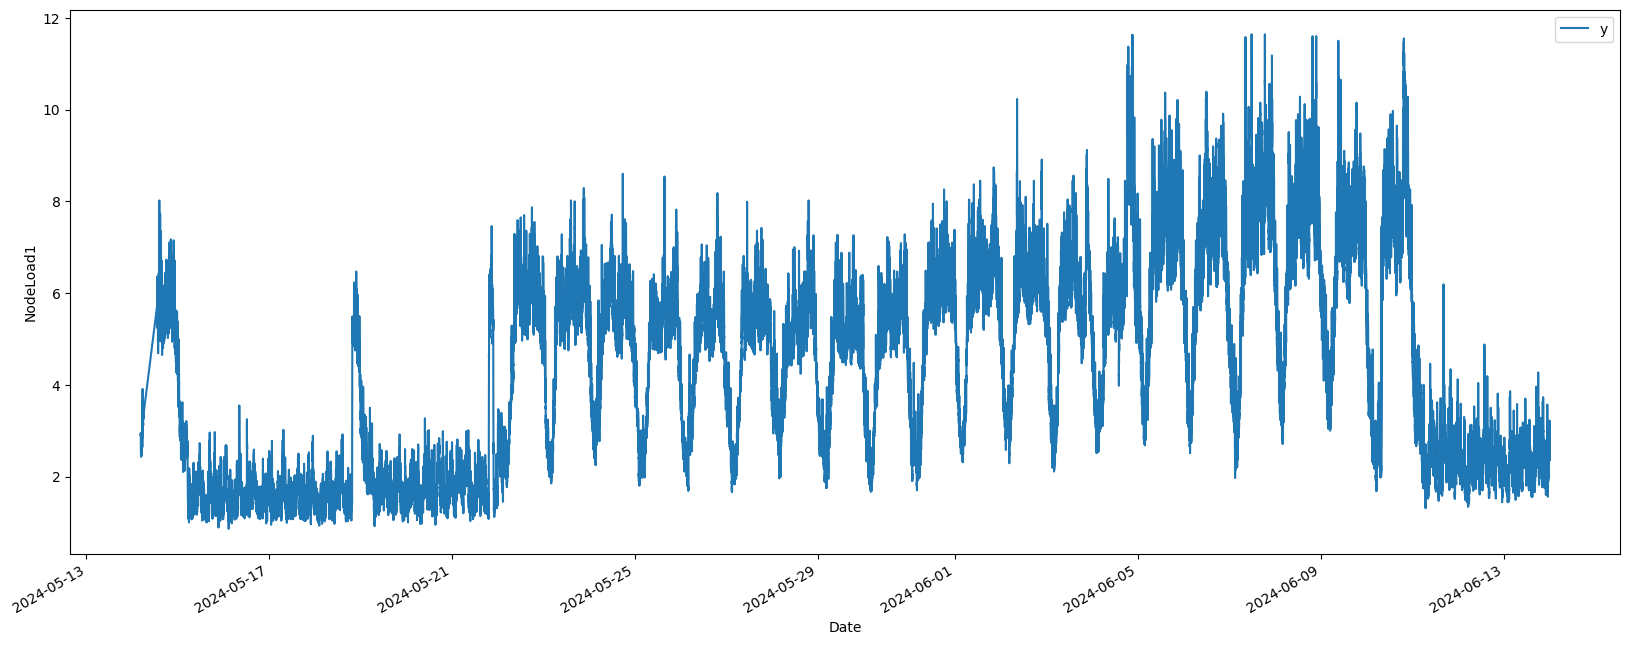

In [7]:
ax = df.set_index('ds').plot(figsize=(20, 8))
ax.set_ylabel('NodeLoad1')
ax.set_xlabel('Date')

plt.show()

In [8]:
import warnings
warnings.filterwarnings('ignore', 'Trying to infer the `batch_size`', UserWarning)

m = NeuralProphet()
df_train, df_val = m.split_df(df, freq='5s', valid_p = 0.2)
metrics = m.fit(df_train, freq='5s', validation_df=df_val)

WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 5s corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col

Training: |                                                                                                   …

Finding best initial lr:   0%|          | 0/290 [00:00<?, ?it/s]

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

In [9]:
metrics

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss
0,2.832623,2.927227,0.308873,0.0,0,0.179078,0.0,2.539185,3.258253,0.179006,0.0
1,3.118441,3.204667,0.350310,0.0,1,0.032842,0.0,0.887587,1.275388,0.032838,0.0
2,3.047128,3.134617,0.340149,0.0,2,0.028807,0.0,0.833824,1.145350,0.028806,0.0
3,3.032846,3.118558,0.338484,0.0,3,0.026076,0.0,0.797093,1.051154,0.026077,0.0
4,3.159977,3.235525,0.353289,0.0,4,0.024227,0.0,0.769060,0.992778,0.024228,0.0
5,3.186852,3.262596,0.355555,0.0,5,0.022998,0.0,0.747260,0.958219,0.022999,0.0
6,3.255239,3.326982,0.365932,0.0,6,0.022348,0.0,0.733328,0.940404,0.022348,0.0
7,3.445513,3.515019,0.391474,0.0,7,0.022026,0.0,0.725524,0.932286,0.022025,0.0
8,3.273818,3.347242,0.367824,0.0,8,0.021774,0.0,0.720321,0.926507,0.021775,0.0
9,3.272672,3.348388,0.369263,0.0,9,0.021536,0.0,0.715675,0.921522,0.021535,0.0


In [10]:
import warnings
warnings.filterwarnings('ignore', 'Trying to infer the `batch_size`', UserWarning)

future = m.make_future_dataframe(df, periods=17280*10, n_historic_predictions=len(df))
forecast = m.predict(future)
forecast.to_csv('../data/predicted/neural_month_predicted_nodeload5.csv', index=False)
forecast

WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 5s corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col

Predicting: |                                                                                                 …

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_weekly,season_daily
0,2024-05-14 04:37:05,2.90,3.420082,5.610358,-0.254081,-1.936195
1,2024-05-14 04:37:10,2.90,3.419946,5.610223,-0.254081,-1.936195
2,2024-05-14 04:37:15,2.95,3.419810,5.610086,-0.254081,-1.936195
3,2024-05-14 04:37:20,2.95,3.419674,5.609951,-0.254081,-1.936195
4,2024-05-14 04:37:25,2.95,3.419539,5.609816,-0.254081,-1.936195
...,...,...,...,...,...,...
699236,2024-06-23 23:59:40,NaN,10.344820,10.890700,-0.166639,-0.379242
699237,2024-06-23 23:59:45,NaN,10.344835,10.890716,-0.166639,-0.379242
699238,2024-06-23 23:59:50,NaN,10.344850,10.890730,-0.166639,-0.379242
699239,2024-06-23 23:59:55,NaN,10.344864,10.890744,-0.166639,-0.379242


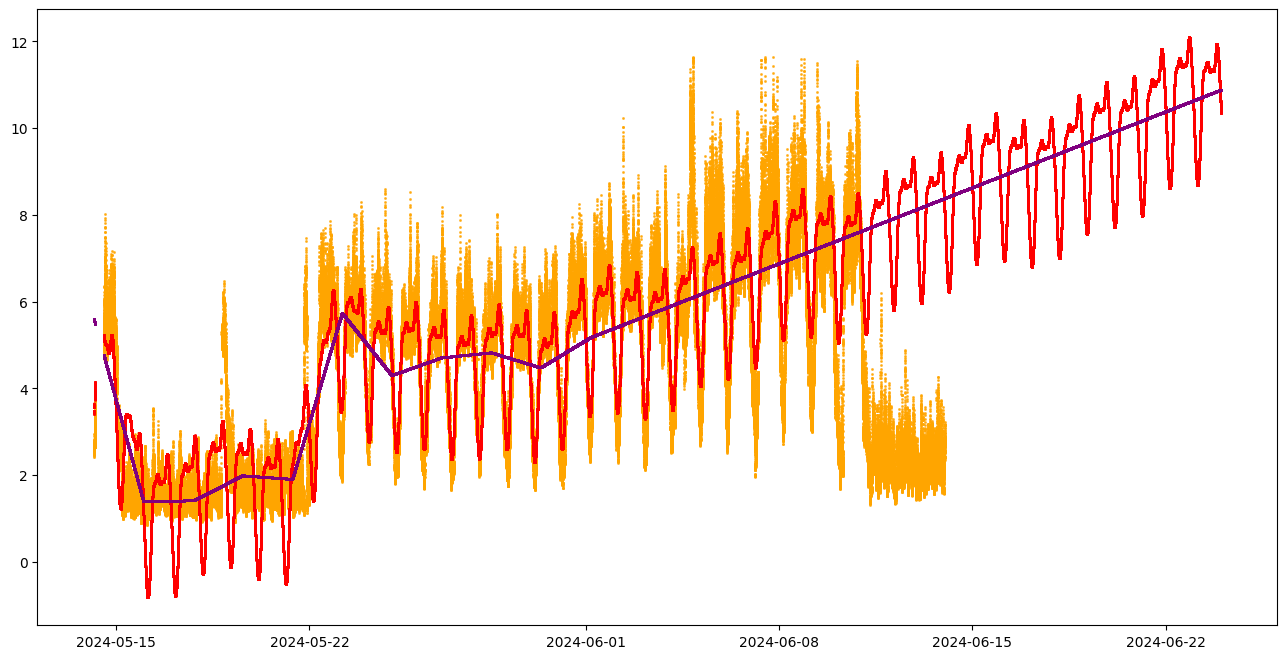

In [11]:
plt.figure(figsize = (16,8))
plt.scatter(df['ds'], df['y'], color='orange', alpha=0.5, s =1)
plt.scatter(forecast['ds'], forecast['yhat1'], color='red', alpha=0.5, s =1)
plt.scatter(forecast['ds'], forecast['trend'], color='purple', alpha=0.5, s =1)